In [31]:
# iterate over every data object in the data/training/synthetic/raw folder
import os
import pandas as pd
import torch
from pathlib import Path
from tqdm import tqdm
import glob

data_dir = Path("../data/training/synthetic/raw")
data_files = os.listdir(data_dir)
data_files = glob.glob(f"{data_dir}/*.pt")

# create a list of dictionaries to store the data
metrics = []
settings = []

for data_file in tqdm(data_files):
    data = torch.load(data_file)
    metrics.append(data.metrics)
    settings.append(data.settings)
df_metrics = pd.DataFrame(metrics)
df_settings = pd.DataFrame(settings)
df_metrics.to_csv("metrics.csv")
df_settings.to_csv("settings.csv")

100%|██████████| 1000/1000 [00:00<00:00, 1019.35it/s]


In [32]:
df_metrics.columns

Index(['diameter', 'average_shortest_path_length',
       'average_clustering_coefficient', 'average_degree', 'n_nodes',
       'n_edges', 'avg_degree_centrality'],
      dtype='object')

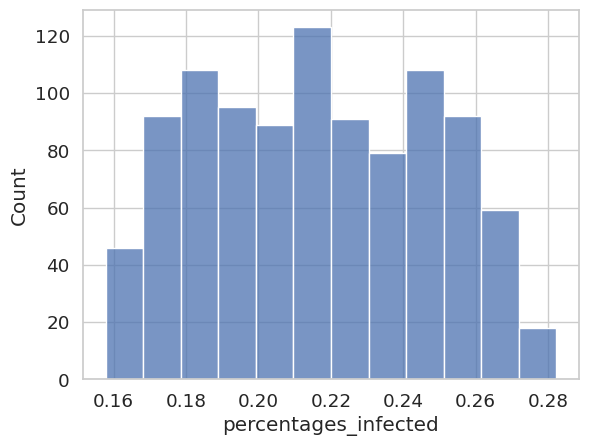

In [33]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

df_settings = pd.read_csv("settings.csv")
df_metrics = pd.read_csv("metrics.csv")
# join the two dataframes on the index
# remove column "Unnamed: 0" from df_metrics
df_metrics = df_metrics.drop(columns=["Unnamed: 0"])
df_metrics = df_metrics.join(df_settings)
df_metrics["percentages_infected"] = df_metrics["currently_infected"] / df_metrics["n_nodes"]

sns.histplot(data=df_metrics, x="percentages_infected")
plt.show()

<Axes: xlabel='avg_degree_centrality', ylabel='percentages_infected'>

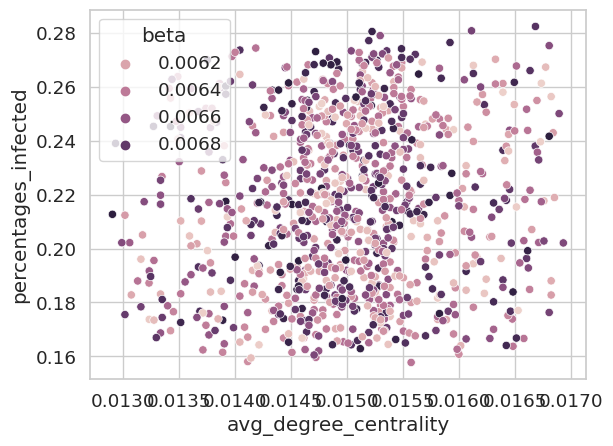

In [34]:
# plot the relationship between iterations and percentage infected
# set x-axis range to 0-10

sns.scatterplot(data=df_metrics, x="avg_degree_centrality", y="percentages_infected", hue="beta")

/tmp/ipykernel_3349893/3561510668.py:30: UserWarning: Tight layout not applied. tight_layout cannot make axes width small enough to accommodate all axes decorations
  plt.tight_layout()


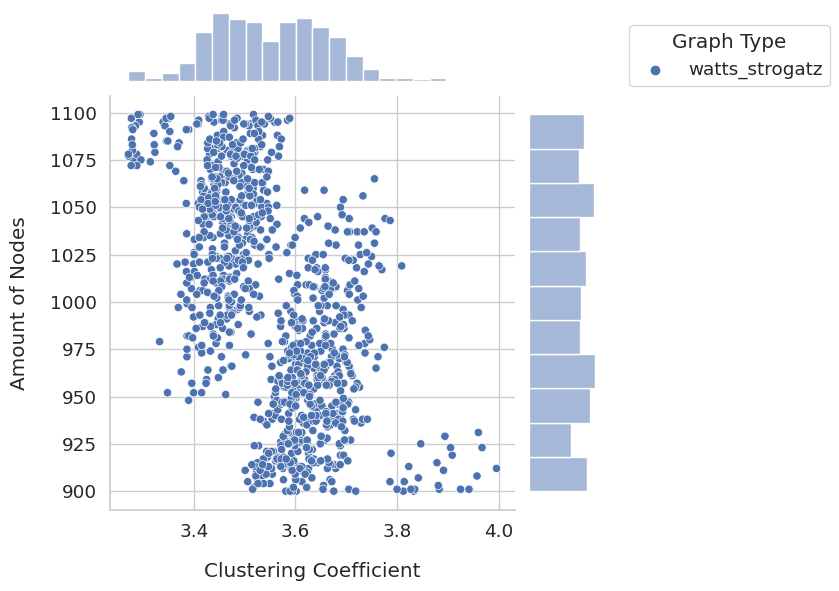

In [35]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Set the style
sns.set(style="whitegrid", font_scale=1.2)

# Create the plot where the data from every folder has to be plotted in a different color.
g1 = sns.JointGrid(
    data=df_metrics, 
    # y="avg_degree_centrality", 
    # x="diameter", 
    x="average_shortest_path_length", 
    y="n_nodes", 
    # x="n_edges", 
    hue="graph_type",
)
g1.plot(sns.scatterplot, sns.histplot)

# Customize the plot
g1.ax_marg_x.set_axis_off()  # Hide x-axis marginal plot
g1.ax_marg_y.set_axis_off()  # Hide y-axis marginal plot

# Set plot title and axis labels
g1.set_axis_labels("Clustering Coefficient", "Amount of Nodes", labelpad=15)
sns.move_legend(g1.ax_joint, "lower right", title='Graph Type', bbox_to_anchor=(1.8, 1))

# Show the plot
plt.tight_layout()
plt.show()

ValueError: Axes(0.149542,0.130583;0.674837x0.690545) has no legend attached.

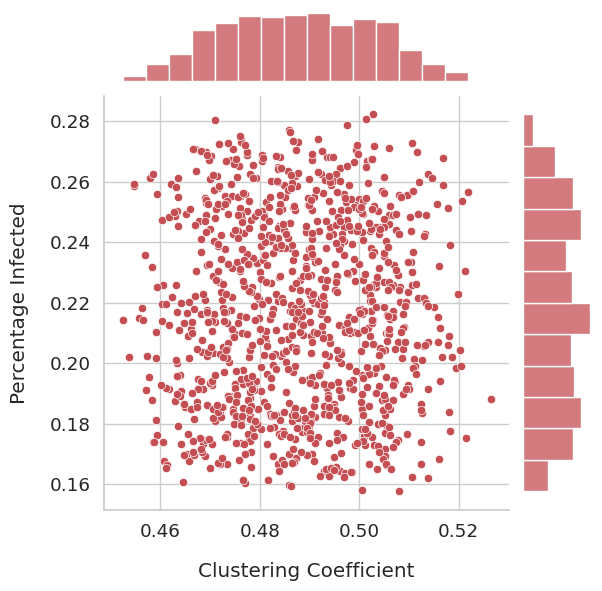

In [36]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Set the style
sns.set(style="whitegrid", font_scale=1.2)

# Create the plot where the data from every folder has to be plotted in a different color.
g = sns.JointGrid(
    data=df_metrics, 
    x="average_clustering_coefficient", 
    # x="avg_degree_centrality", 
    # x="average_shortest_path_length", 
    y="percentages_infected", 
    # hue="beta",
)
#color dots red
g.plot_joint(sns.scatterplot, color="r")
#plot histogram on x-axis
g.plot_marginals(sns.histplot, color="r")

# Customize the plot
g.ax_marg_x.set_axis_off()  # Hide x-axis marginal plot
g.ax_marg_y.set_axis_off()  # Hide y-axis marginal plot

# Set plot title and axis labels
g.set_axis_labels("Clustering Coefficient", "Percentage Infected", labelpad=15)
sns.move_legend(g.ax_joint, "lower right", title='Graph Type', bbox_to_anchor=(1.8, 1))

# Show the plot
plt.tight_layout()
plt.show()

In [ ]:
data_files = [Path("../data/validation/airports/raw/0.pt"),
             Path("../data/validation/facebook/raw/0.pt"), 
             Path("../data/validation/karate/raw/0.pt"),
             Path("../data/validation/actor/raw/0.pt"),
             Path("../data/validation/github/raw/0.pt"),
             Path("../data/validation/wiki/raw/0.pt"),
             Path("../data/validation/synthetic/raw/0.pt")
            ]


name = ["airports", "facebook", "karate", "actor", "github", "wiki", "synthetic"]

# create a list of dictionaries to store the data
metrics = []
settings = []

for data_file in tqdm(data_files):
    
    try:
        data = torch.load(data_file)
        metrics.append(data.metrics)
        settings.append(data.settings)
        metrics[-1]["name"] = name[data_files.index(data_file)]
    except:
        print(f"missing data file: {data_file}")
df_metrics = pd.DataFrame(metrics)
df_settings = pd.DataFrame(settings)
df_metrics.to_csv("metrics_validation.csv")
df_settings.to_csv("settings_validation.csv")

df_metrics

100%|██████████| 7/7 [00:00<00:00, 273.20it/s]

missing data file: ../data/validation/github/raw/0.pt


,diameter,average_shortest_path_length,average_clustering_coefficient,average_degree,n_nodes,n_edges,avg_degree_centrality,name
0,5,2.323611,0.539272,30.040100,399,5993,0.075478,airports
1,8,3.692507,0.605547,43.691013,4039,88234,0.010820,facebook
2,5,2.408200,0.570638,4.588235,34,78,0.139037,karate
3,12,4.110280,0.080193,7.015526,7600,26659,0.000923,actor
4,9,3.651620,0.383466,9.836232,2357,11592,0.004175,wiki
5,6,3.691820,0.488566,14.000000,1046,7322,0.013397,synthetic
